<a href="https://colab.research.google.com/github/Luiz-Henrique05/Sleep-Health/blob/main/Sleep_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


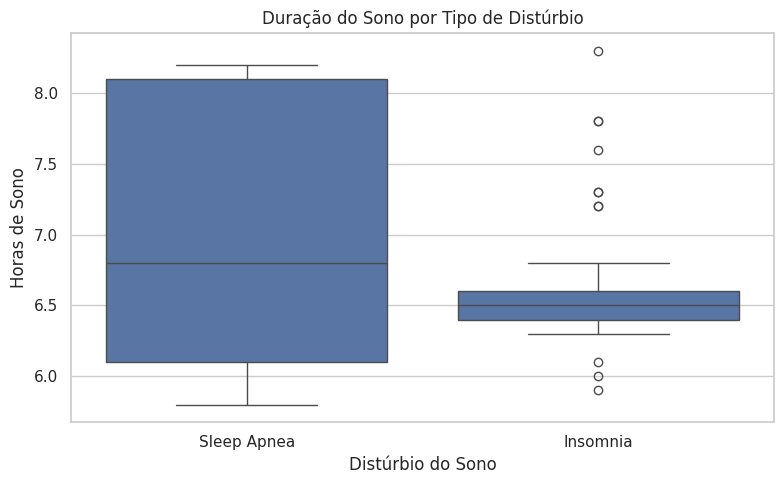

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Gráfico 1: Duração do sono por tipo de distúrbio
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Duração do Sono por Tipo de Distúrbio')
plt.xlabel('Distúrbio do Sono')
plt.ylabel('Horas de Sono')
plt.tight_layout()
plt.show()


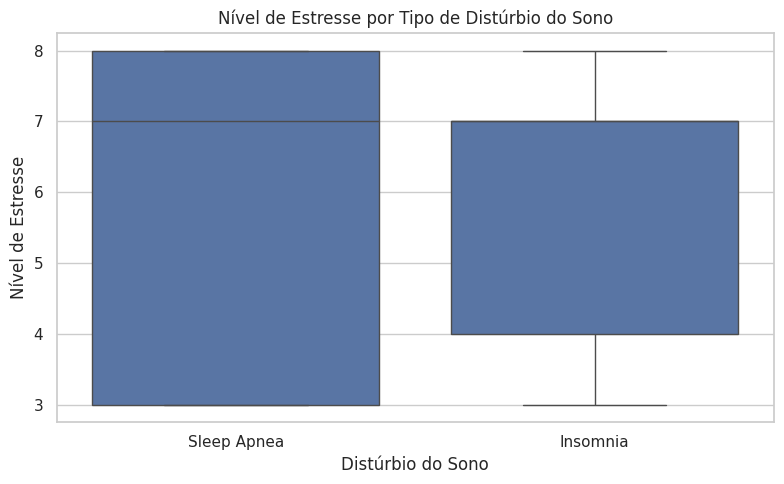

In [ ]:
# Gráfico 2: Nível de estresse por distúrbio do sono
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Nível de Estresse por Tipo de Distúrbio do Sono')
plt.xlabel('Distúrbio do Sono')
plt.ylabel('Nível de Estresse')
plt.tight_layout()
plt.show()


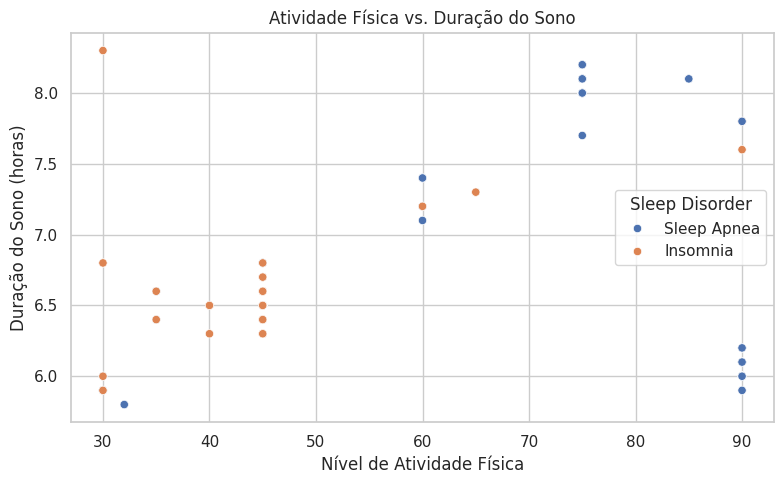

In [ ]:
# Gráfico 3: Duração do sono x Atividade física
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', hue='Sleep Disorder', data=df)
plt.title('Atividade Física vs. Duração do Sono')
plt.xlabel('Nível de Atividade Física')
plt.ylabel('Duração do Sono (horas)')
plt.tight_layout()
plt.show()


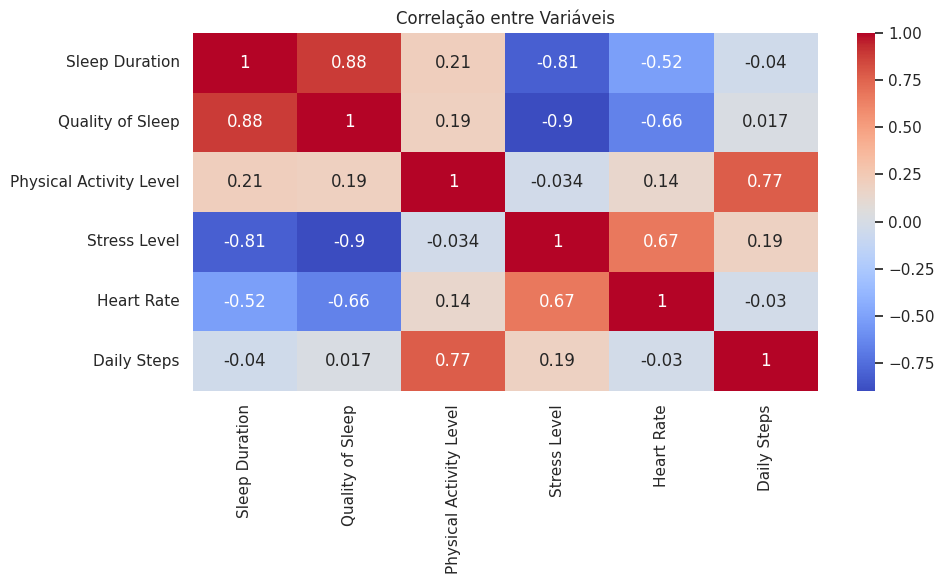

In [ ]:
# Gráfico 4: Mapa de calor de correlação
plt.figure(figsize=(10, 6))
corr = df[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.tight_layout()
plt.show()


In [ ]:
# Quais profissões dormem menos ou têm mais distúrbios
df.groupby('Occupation')['Sleep Duration'].mean().sort_values()
df.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True)

Occupation            Sleep Disorder
Accountant            Insomnia          1.000000
Doctor                Sleep Apnea       0.571429
                      Insomnia          0.428571
Engineer              Insomnia          0.833333
                      Sleep Apnea       0.166667
Lawyer                Sleep Apnea       0.600000
                      Insomnia          0.400000
Nurse                 Sleep Apnea       0.953125
                      Insomnia          0.046875
Sales Representative  Sleep Apnea       1.000000
Salesperson           Insomnia          0.966667
                      Sleep Apnea       0.033333
Scientist             Sleep Apnea       1.000000
Software Engineer     Insomnia          1.000000
Teacher               Insomnia          0.870968
                      Sleep Apnea       0.129032
Name: proportion, dtype: float64

In [ ]:
# Verificar impacto do IMC no sono
df.groupby('BMI Category')['Sleep Duration'].mean()
df.groupby('BMI Category')['Quality of Sleep'].mean()


,Quality of Sleep
BMI Category,
Normal,7.661538
Normal Weight,7.428571
Obese,6.400000
Overweight,6.898649


In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Função de simulação
def simulador_sono(idade, genero, atividade, estresse):
    qualidade_base = 7.0
    if atividade < 30:
        qualidade_base -= 1
    elif atividade > 60:
        qualidade_base += 0.5
    if estresse >= 8:
        qualidade_base -= 1.5
    elif estresse <= 4:
        qualidade_base += 0.5
    if idade > 50:
        qualidade_base -= 0.5
    return np.clip(qualidade_base, 1, 10)

def analisar_usuario(idade, genero, atividade, estresse):
    qualidade = simulador_sono(idade, genero, atividade, estresse)
    similar = df[
        (df['Age'].between(idade - 5, idade + 5)) &
        (df['Physical Activity Level'].between(atividade - 10, atividade + 10)) &
        (df['Stress Level'].between(estresse - 1, estresse + 1))
    ]
    if len(similar) > 0:
        media_similar = similar['Quality of Sleep'].mean()
        porcentagem = (similar['Quality of Sleep'] < qualidade).mean() * 100
    else:
        media_similar = None
        porcentagem = None
    output = f"### Resultado da Simulação\n"
    output += f"- Qualidade prevista do sono: **{qualidade:.1f}/10**\n"
    if media_similar is not None:
        output += f"- Média das pessoas semelhantes: **{media_similar:.1f}/10**\n"
        output += f"- Você dorme melhor que **{porcentagem:.0f}%** das pessoas com perfil semelhante."
    else:
        output += f"- Não há dados suficientes no conjunto para comparação com esse perfil."
    display(Markdown(output))

# Interface
idade_slider = widgets.IntSlider(value=30, min=18, max=70, description='Idade:')
atividade_slider = widgets.IntSlider(value=40, min=0, max=100, description='Atividade:')
estresse_slider = widgets.IntSlider(value=5, min=1, max=10, description='Estresse:')
genero_dropdown = widgets.Dropdown(options=['Masculino', 'Feminino'], description='Gênero:')
simular_btn = widgets.Button(description='Simular Sono', button_style='success')

def on_button_click(b):
    analisar_usuario(idade_slider.value, genero_dropdown.value, atividade_slider.value, estresse_slider.value)

simular_btn.on_click(on_button_click)

display(Markdown("## Simulador de Qualidade do Sono"))
display(idade_slider, genero_dropdown, atividade_slider, estresse_slider, simular_btn)

## Simulador de Qualidade do Sono

IntSlider(value=30, description='Idade:', max=70, min=18)

Dropdown(description='Gênero:', options=('Masculino', 'Feminino'), value='Masculino')

IntSlider(value=40, description='Atividade:')

IntSlider(value=5, description='Estresse:', max=10, min=1)

Button(button_style='success', description='Simular Sono', style=ButtonStyle())

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Markdown

def simulador_sono(idade, genero, atividade, estresse, sleep_disorder):
    qualidade_base = 7.0
    if atividade < 30:
        qualidade_base -= 1
    elif atividade > 60:
        qualidade_base += 0.5
    if estresse >= 8:
        qualidade_base -= 1.5
    elif estresse <= 4:
        qualidade_base += 0.5
    if idade > 50:
        qualidade_base -= 0.5
    if sleep_disorder != 'None':
        qualidade_base -= 1
    return np.clip(qualidade_base, 1, 10)

def gerar_recomendacao(idade, genero, atividade, estresse, sleep_disorder):
    qualidade = simulador_sono(idade, genero, atividade, estresse, sleep_disorder)

    similar = df[
        (df['Age'].between(idade - 5, idade + 5)) &
        (df['Physical Activity Level'].between(atividade - 10, atividade + 10)) &
        (df['Stress Level'].between(estresse - 1, estresse + 1))
    ]

    total_similares = len(similar)
    if total_similares > 0:
        media_similar = similar['Quality of Sleep'].mean()
        porcentagem = (similar['Quality of Sleep'] < qualidade).mean() * 100
        mensagem_comparativa = f"""
Foi possível identificar **{total_similares} pessoas** com características semelhantes no conjunto de dados.
Dentre elas, a **qualidade média de sono** observada é de **{media_similar:.1f}/10**.
Você apresenta uma qualidade de sono superior à de aproximadamente **{porcentagem:.0f}%** dessas pessoas.
"""
    else:
        mensagem_comparativa = """
Não foram encontrados dados suficientes de pessoas com perfil semelhante no conjunto atual.
Ainda assim, sua estimativa foi gerada com base em regras estatísticas aplicadas sobre a base geral.
"""

    dist_texto = "Não foi informado distúrbio do sono." if sleep_disorder == 'None' else f"Distúrbio identificado: **{sleep_disorder}**."

    recomendacao = f"""\
### Diagnóstico Personalizado

Com base nos parâmetros fornecidos, sua **qualidade de sono estimada** é de **{qualidade:.1f}/10**.
{dist_texto}

{mensagem_comparativa}
---

### Recomendações Técnicas e Orientações

- **Atividade Física:**
Pessoas com atividade física superior a 60 unidades apresentam, em média, acréscimo de até **+0.5 ponto** na qualidade do sono.
Adotar uma rotina ativa pode ser uma estratégia eficiente para promover o bem-estar e melhorar seu descanso noturno.

- **Estresse:**
Há uma correlação fortemente negativa entre estresse e qualidade do sono (r = –0.90).
Reduzir o estresse com técnicas como meditação, pausas conscientes e acompanhamento psicológico pode trazer benefícios diretos para o sono.

- **Faixa Etária:**
Indivíduos com mais de 50 anos tendem a apresentar redução leve na qualidade do sono, o que é fisiologicamente esperado.
Manter consistência nos horários, evitar estimulantes e criar um ambiente propício ao sono são boas práticas para todas as idades.

---

**A evolução dos seus hábitos é o fator mais poderoso para transformar sua saúde.**
Use esse diagnóstico como ponto de partida para decisões mais conscientes com base em dados reais.
"""
    display(Markdown(recomendacao))

# Interface interativa
idade_slider = widgets.IntSlider(value=30, min=18, max=70, description='Idade:')
atividade_slider = widgets.IntSlider(value=40, min=0, max=100, description='Atividade:')
estresse_slider = widgets.IntSlider(value=5, min=1, max=10, description='Estresse:')
genero_dropdown = widgets.Dropdown(options=['Masculino', 'Feminino'], description='Gênero:')
sleep_dropdown = widgets.Dropdown(options=['None', 'Insomnia', 'Sleep Apnea'], description='Distúrbio:')

simular_btn = widgets.Button(description='Simular Sono', button_style='success')

def on_button_click(b):
    gerar_recomendacao(
        idade_slider.value,
        genero_dropdown.value,
        atividade_slider.value,
        estresse_slider.value,
        sleep_dropdown.value
    )

simular_btn.on_click(on_button_click)

display(Markdown("## Simulador de Qualidade do Sono"))
display(idade_slider, genero_dropdown, atividade_slider, estresse_slider, sleep_dropdown, simular_btn)

## Simulador de Qualidade do Sono

IntSlider(value=30, description='Idade:', max=70, min=18)

Dropdown(description='Gênero:', options=('Masculino', 'Feminino'), value='Masculino')

IntSlider(value=40, description='Atividade:')

IntSlider(value=5, description='Estresse:', max=10, min=1)

Dropdown(description='Distúrbio:', options=('None', 'Insomnia', 'Sleep Apnea'), value='None')

Button(button_style='success', description='Simular Sono', style=ButtonStyle())

### Diagnóstico Personalizado

Com base nos parâmetros fornecidos, sua **qualidade de sono estimada** é de **7.0/10**.
Não foi informado distúrbio do sono.


Foi possível identificar **6 pessoas** com características semelhantes no conjunto de dados.
Dentre elas, a **qualidade média de sono** observada é de **6.7/10**.
Você apresenta uma qualidade de sono superior à de aproximadamente **50%** dessas pessoas.

---

### Recomendações Técnicas e Orientações

- **Atividade Física:**
Pessoas com atividade física superior a 60 unidades apresentam, em média, acréscimo de até **+0.5 ponto** na qualidade do sono.
Adotar uma rotina ativa pode ser uma estratégia eficiente para promover o bem-estar e melhorar seu descanso noturno.

- **Estresse:**
Há uma correlação fortemente negativa entre estresse e qualidade do sono (r = –0.90).
Reduzir o estresse com técnicas como meditação, pausas conscientes e acompanhamento psicológico pode trazer benefícios diretos para o sono.

- **Faixa Etária:**
Indivíduos com mais de 50 anos tendem a apresentar redução leve na qualidade do sono, o que é fisiologicamente esperado.
Manter consistência nos horários, evitar estimulantes e criar um ambiente propício ao sono são boas práticas para todas as idades.

---

**A evolução dos seus hábitos é o fator mais poderoso para transformar sua saúde.**
Use esse diagnóstico como ponto de partida para decisões mais conscientes com base em dados reais.
